In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader
from torch import nn
import torch
import torchvision

In [ ]:
train_data = datasets.FashionMNIST(
  root="image",
  train=True,
  download=True,
  transform=ToTensor()
)

test_data = datasets.FashionMNIST(
  root="image",
  train=False,
  download=True,
  transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15930277.52it/s]


Extracting image/FashionMNIST/raw/train-images-idx3-ubyte.gz to image/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273431.81it/s]


Extracting image/FashionMNIST/raw/train-labels-idx1-ubyte.gz to image/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5053054.31it/s]


Extracting image/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to image/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5334060.52it/s]

Extracting image/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to image/FashionMNIST/raw



In [ ]:
img, label = train_data[0]
class_names = train_data.classes
class_names[label]
img.shape
img.permute(1, 2, 0).shape

torch.Size([28, 28, 1])

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Shirt')

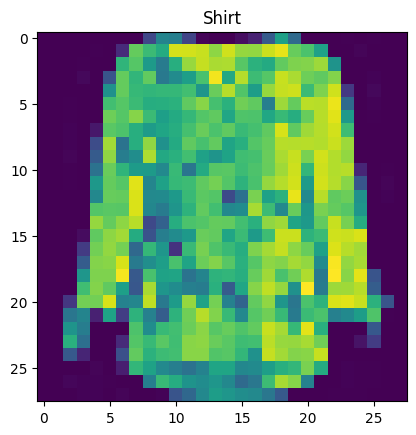

In [ ]:
random_idx = random.randint(0, len(train_data)-1)
img, label = train_data[random_idx]
plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])

In [ ]:
len(train_data), len(test_data)

BATCH_SIZE = 32

train_dataloader = DataLoader(
  train_data,
  batch_size=BATCH_SIZE,
  shuffle=True
)

test_dataloader = DataLoader(
  test_data,
  batch_size=BATCH_SIZE,
  shuffle=False
)

len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
x_first_batch, y_first_batch = next(iter(train_dataloader))
x_first_batch.shape, y_first_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

NameError: ignored

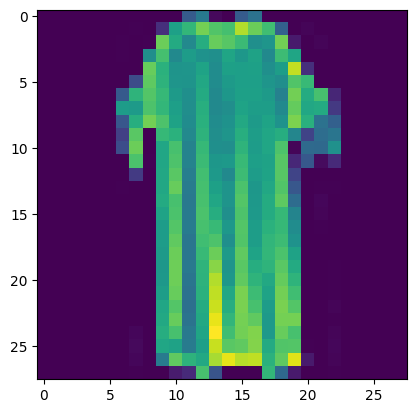

In [ ]:
random_idx = random.randint(0, len(x_first_batch)-1)
img, label = x_first_batch[random_idx], y_first_batch[random_idx]

plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])

In [ ]:
x_first_batch[0].shape

torch.Size([1, 28, 28])

In [ ]:
f = nn.Flatten(start_dim=0, end_dim=-1)
f(x_first_batch[0]).shape

torch.Size([784])

In [ ]:
class ImageClassificationModel(nn.Module):
  def __init__(self, input_shape, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1),
      nn.Linear(in_features=input_shape, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
x_first_batch, y_first_batch = next(iter(train_dataloader))
x_first_batch.shape, y_first_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
# torch.manual_seed(87)
model = ImageClassificationModel(28*28, 10)
y_pred = model(x_first_batch)
y_pred.argmax(dim=1)

tensor([6, 3, 3, 6, 9, 6, 8, 0, 5, 6, 9, 9, 5, 5, 9, 7, 9, 9, 9, 5, 3, 8, 9, 9,
        6, 3, 9, 9, 7, 9, 0, 9])

In [ ]:
cost_fn = nn.CrossEntropyLoss()
y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch)
print(cost)
print(model.state_dict())

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch)
print(cost)
print(model.state_dict())

tensor(2.3064, grad_fn=<NllLossBackward0>)
OrderedDict([('layer_stack.1.weight', tensor([[ 0.0310,  0.0016, -0.0099,  ..., -0.0267,  0.0257, -0.0096],
        [-0.0071,  0.0250,  0.0319,  ...,  0.0087,  0.0211,  0.0044],
        [-0.0058, -0.0032,  0.0130,  ..., -0.0153,  0.0353, -0.0307],
        ...,
        [-0.0179,  0.0287, -0.0270,  ...,  0.0334,  0.0305, -0.0312],
        [ 0.0255,  0.0317,  0.0246,  ..., -0.0047,  0.0308, -0.0319],
        [ 0.0263, -0.0333, -0.0219,  ..., -0.0229, -0.0095,  0.0162]])), ('layer_stack.1.bias', tensor([ 0.0177,  0.0137,  0.0143, -0.0117,  0.0093,  0.0291, -0.0177, -0.0288,
        -0.0189,  0.0319]))])
tensor(2.2647, grad_fn=<NllLossBackward0>)
OrderedDict([('layer_stack.1.weight', tensor([[ 0.0310,  0.0016, -0.0099,  ..., -0.0267,  0.0257, -0.0096],
        [-0.0071,  0.0250,  0.0319,  ...,  0.0087,  0.0211,  0.0044],
        [-0.0058, -0.0032,  0.0130,  ..., -0.0153,  0.0353, -0.0307],
        ...,
        [-0.0179,  0.0287, -0.0270,  ...,  0.0

In [ ]:
def accuracy_fn(y_pred, y_true):

  correct_num = (y_pred==y_true).sum()
  acc = correct_num / len(y_true) * 100

  return acc

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

ImageClassificationModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [ ]:
def train_step(dataloader, model, cost_fn, optimizer, accuracy_fn, device):
  train_cost = 0
  train_acc = 0
  for batch, (x, y) in enumerate(dataloader):
    x = x.to(device)
    y = y.to(device)

    model.train()

    y_pred = model(x)

    cost = cost_fn(y_pred, y)

    train_cost += cost
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

    optimizer.zero_grad()

    cost.backward()

    optimizer.step()

  train_cost /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f"\nTrain Cost: {train_cost:.4f}, Train Acc: {train_acc:.2f}")


def test_step(dataloader, model, cost_fn, accuracy_fn, device):
  test_cost = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for x, y in dataloader:
      x = x.to(device)
      y = y.to(device)

      test_pred = model(x)

      test_cost += cost_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

    test_cost /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Test Cost: {test_cost:.4f}, Test Acc: {test_acc:.2f} \n")

In [ ]:
from tqdm.auto import tqdm

epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  train_step(train_dataloader, model, cost_fn, optimizer, accuracy_fn, device)

  test_step(test_dataloader, model, cost_fn, accuracy_fn, device)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------

Train Cost: 0.8159, Train Acc: 74.99
Test Cost: 0.6469, Test Acc: 78.74 

Epoch: 1
-------

Train Cost: 0.5884, Train Acc: 80.85
Test Cost: 0.5774, Test Acc: 80.80 

Epoch: 2
-------

Train Cost: 0.5394, Train Acc: 82.23
Test Cost: 0.5485, Test Acc: 81.57 

Epoch: 3
-------

Train Cost: 0.5133, Train Acc: 82.90
Test Cost: 0.5279, Test Acc: 82.09 

Epoch: 4
-------

Train Cost: 0.4962, Train Acc: 83.48
Test Cost: 0.5160, Test Acc: 82.36 

Epoch: 5
-------

Train Cost: 0.4840, Train Acc: 83.76
Test Cost: 0.5066, Test Acc: 82.78 

Epoch: 6
-------

Train Cost: 0.4741, Train Acc: 84.14
Test Cost: 0.5014, Test Acc: 83.05 

Epoch: 7
-------

Train Cost: 0.4664, Train Acc: 84.31
Test Cost: 0.4949, Test Acc: 82.86 

Epoch: 8
-------

Train Cost: 0.4600, Train Acc: 84.47
Test Cost: 0.4869, Test Acc: 83.25 

Epoch: 9
-------

Train Cost: 0.4548, Train Acc: 84.60
Test Cost: 0.4833, Test Acc: 83.21 



In [ ]:
class ImageClassificationModel2(nn.Module):
  def __init__(self, input_shape, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1),
      nn.Linear(in_features=input_shape, out_features=5),
      nn.ReLU(),
      nn.Linear(in_features=5, out_features=8),
      nn.ReLU(),
      nn.Linear(in_features=8, out_features=output_shape),
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
model_2 = ImageClassificationModel2(28*28, 10)
model_2.to(device)
cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [ ]:
epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  train_step(train_dataloader, model_2, cost_fn, optimizer, accuracy_fn, device)

  test_step(test_dataloader, model_2, cost_fn, accuracy_fn, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------

Train Cost: 1.6190, Train Acc: 40.34
Test Cost: 1.1267, Test Acc: 57.54 

Epoch: 1
-------

Train Cost: 0.9843, Train Acc: 62.32
Test Cost: 0.9084, Test Acc: 70.15 

Epoch: 2
-------

Train Cost: 0.8204, Train Acc: 72.24
Test Cost: 0.7620, Test Acc: 73.55 

Epoch: 3
-------

Train Cost: 0.6801, Train Acc: 75.29
Test Cost: 0.6515, Test Acc: 76.48 

Epoch: 4
-------

Train Cost: 0.6044, Train Acc: 77.53
Test Cost: 0.6081, Test Acc: 78.05 

Epoch: 5
-------

Train Cost: 0.5743, Train Acc: 78.62
Test Cost: 0.5872, Test Acc: 78.71 

Epoch: 6
-------

Train Cost: 0.5566, Train Acc: 79.23
Test Cost: 0.5889, Test Acc: 77.87 

Epoch: 7
-------

Train Cost: 0.5432, Train Acc: 79.83
Test Cost: 0.5644, Test Acc: 79.39 

Epoch: 8
-------

Train Cost: 0.5294, Train Acc: 80.81
Test Cost: 0.5478, Test Acc: 80.82 

Epoch: 9
-------

Train Cost: 0.5110, Train Acc: 81.93
Test Cost: 0.5314, Test Acc: 81.69 



In [ ]:
def eval_model(dataloader, model, cost_fn, accuracy_fn, device):
  test_cost = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for x, y in dataloader:
      x = x.to(device)
      y = y.to(device)

      test_pred = model(x)

      test_cost += cost_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

    test_cost /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  return {
      "model_name": model.__class__.__name__,
      "model_cost": test_cost.item(),
      "model_acc": test_acc.item()
  }

In [ ]:
model_1_result = eval_model(test_dataloader, model, cost_fn, accuracy_fn, device)
model_1_result

{'model_name': 'ImageClassificationModel',
 'model_cost': 0.4833093285560608,
 'model_acc': 83.20687103271484}

In [ ]:
model_2_result = eval_model(test_dataloader, model_2, cost_fn, accuracy_fn, device)
model_2_result

{'model_name': 'ImageClassificationModel2',
 'model_cost': 0.5314356088638306,
 'model_acc': 81.68929290771484}

# **其他種類的神經網路**

In [ ]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(5, 5), stride=1, padding=1)
conv_output = conv_layer(x_first_batch[0])
print(conv_output.shape)
# x_first_batch[0].shape
maxpool = nn.MaxPool2d(kernel_size=(2, 2), stride=1, padding=0)
maxpool(conv_output).shape

torch.Size([8, 26, 26])


torch.Size([8, 25, 25])

In [ ]:
class ImageClassificationModel3(nn.Module):
  def __init__(self, input_shape, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
          out_channels=8,
          kernel_size=(3, 3),
          stride=1,
          padding=1
      ),
      nn.ReLU(),
      nn.Conv2d(in_channels=8,
          out_channels=8,
          kernel_size=(3, 3),
          stride=1,
          padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=(2, 2),
            stride=2,
            padding=0
      )
    )

    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=8,
          out_channels=16,
          kernel_size=(3, 3),
          stride=1,
          padding=1
      ),
      nn.ReLU(),
      nn.Conv2d(in_channels=16,
          out_channels=16,
          kernel_size=(3, 3),
          stride=1,
          padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=(2, 2),
            stride=2,
            padding=0
      )
    )

    self.classifier = nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1),
      nn.Linear(in_features=16*7*7, out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [ ]:
model_3 = ImageClassificationModel3(1, 10)
model_3.to(device)
cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)

In [ ]:
from tqdm.auto import tqdm
epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  train_step(train_dataloader, model_3, cost_fn, optimizer, accuracy_fn, device)

  test_step(test_dataloader, model_3, cost_fn, accuracy_fn, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------

Train Cost: 0.3777, Train Acc: 86.40
Test Cost: 0.3877, Test Acc: 86.07 

Epoch: 1
-------

Train Cost: 0.3501, Train Acc: 87.51
Test Cost: 0.3604, Test Acc: 87.34 

Epoch: 2
-------

Train Cost: 0.3313, Train Acc: 88.27
Test Cost: 0.3557, Test Acc: 87.42 

Epoch: 3
-------

Train Cost: 0.3170, Train Acc: 88.65
Test Cost: 0.3621, Test Acc: 87.05 

Epoch: 4
-------

Train Cost: 0.3062, Train Acc: 88.95
Test Cost: 0.3414, Test Acc: 87.46 

Epoch: 5
-------

Train Cost: 0.2977, Train Acc: 89.23
Test Cost: 0.3342, Test Acc: 88.02 

Epoch: 6
-------

Train Cost: 0.2902, Train Acc: 89.59
Test Cost: 0.3378, Test Acc: 87.56 

Epoch: 7
-------

Train Cost: 0.2833, Train Acc: 89.76
Test Cost: 0.3175, Test Acc: 88.67 

Epoch: 8
-------

Train Cost: 0.2772, Train Acc: 89.94
Test Cost: 0.3122, Test Acc: 88.93 

Epoch: 9
-------

Train Cost: 0.2719, Train Acc: 90.26
Test Cost: 0.3267, Test Acc: 88.46 

